**Causal Inference for Policy Evaluation (HS 2021)**

**Conny Wunsch, Ulrike Unterhofer and Véra Zabrodina** -- University of Basel

***

# Lab Session 3 - Instrumental Variables (IV)

***


![](./IV.JPG)

Key ingredients for an IV design:

* An endogenous treatment.
* A variable that is correlated with this treatment but which does not directly affect the outcome (instrument).

## Application: Children and Their Parents' Labor Supply: Evidence from Exogenous Variation in Family Size
**Angrist, J., and W. Evans, American Economic Review 1998**

![](./Angrist2.JPG)


***
## 1. Introduction


* What is the research question?


* Why is this question of interest?


* How is the treatment defined, and what are the outcome variables of interest?


* Why would comparing the average labour supply outcomes of women with different numbers of children result in a biased estimate of the effect of fertility on labour supply? What is the endogeneity problem?


* Which instrumental variables do the authors use? 



### Notation

* $Z_i\in\{0,1\}$ ... binary instrument:  having  a second child of the same gender as the first child (*samesex*)
* $D_i\in\{0,1\}$ ... binary treatment status: having more than 2 children yes/no (*morekids*)
* $D_{0,i}^*\in\{0,1\}$ ... potential treatment status when $Z_i=0$
* $D_{1,i} ^*\in\{0,1\}$ ... potential treatment status when $Z_i=1$
* $Y_{dz} ^*$ ... potential outcome under treatment $D=d$ and instrument $Z=z$
* $Y_i$ ... observed outcome 

### What kind of effect do we identify?

We are going to identify a **Local Average Treatment Effect (LATE)**, meaning an effect for those who react to the instrument being *samesex* by having more children.

***

## 2. Identification strategy and assumptions

### Discussion of assumptions

What do these assumptions mean in words?

*	What could invalidate them? Think of concrete examples or mechanisms.
*	Which arguments or evidence can you provide to support that they hold?

**A1 Stable unit treatment value assumption (SUTVA):**

 $Y_{i}=D_{i}Z_i Y^*_{11,i} + D_i (1-Z_i)Y^*_{10,i} +(1-D_i)Z_iY^*_{01,i} + (1-D_i)(1-Z_i) Y^*_{00,i}$
 
 $D_{i}=Z_{i}D^*_{1,i}+(1-Z_{i})D^*_{0,i}$
 
 No spillovers from treated on non-treated and instrumented on non-instrumented:

 * having more than 2 children is unlikely to affect the labour supply of women with 2 children.
 
 * having two children of the same sex has no effect on the likelihood of having another child for those who have 2 children of mixed sex.
 
**A2 Exclusion restriction and exogeneity:** 

$ Y^*_{d0,i} = Y^*_{d1,i} \equiv  Y^*_{d,i}$ for all $i$ and $d \in \{0,1\}$

* No direct effect of the instrument on the outcome

$Y^*_{0,i},Y^*_{1,i},D^*_{0,i},D^*_{1,i}\perp Z_i|X_i$

*  The instrument is randomly assigned (possibly conditional on $X$). 
*  No counfounders that determine both $Z$ and $Y$ or $D$.

**A3 Monotonicity:**

$D^*_{1,i}\geq D^*_{0,i}$ for all $i$ and $D^*_{1,i}>D^*_{0,i}$ for some $i$

 * The instrument moves the endogenous variable in one direction. 
 * There exist compliers but no defiers. 
 * Partially testable. How?
 * Do you expect this to hold in our setting?

**A4 Common support:**

$Supp(X|Z_i=0)=Supp(X|Z_i=1)$

* There are always both individuals with $Z_i=1$ and $Z_i=0$ with the same $X$.
* Needed if exogeneity only holds conditional on $X$.
* Testable.

***

## 3. Data

* Census Public Use Micro Samples (PUMS) 1980

    
* We use a random sample covering one third of the observations.


* What is the unit of observation? -- 1 line = 1 household, separate variables for mothers and fathers.


* What is the time dimension? -- One cross-section.


* Preliminary data prep done by the authors: 

    * Children are matched to female household head or the spouse of a male household head. 
    * Mothers for whom the number of children did not match the reported number were deleted from the data. 



* Here, focus on women with two and more children. The paper also analyses the married sample. 


* List of  variables: 


|Variable name| Description|
|:----|:----|
|**Treatment variables** ||
|*morekids*|        had more than 2 kids |
|*kidcount*|        count of kids in household |
|**Instruments** ||
|*samesex*|        first two kids are of same sex |
|*multi2nd*|        second birth twins |
|**Outcome variables** ||
|*weeksm*|        weeks worked per year, mom |
|*hourswm*|        hours worked per week, mom |
|*weeksd*|        weeks worked per year, dad |
|*hourswd*|        hours worked per week, dad |
|*workedm*|        worked for pay, mom |
|*workedd*|        worked for pay, dad |
|*incomem*|        moms labour income (adjusted) |
|*incomed*|        dads labour income (adjusted) |
|*faminc*|        family income (adjusted) |
|*lfaminc*|        log family income (adjusted) |
|*nonmomi*|        income not generated by mom (adjusted) |
|*lnonmomi*|        log income not generated by mom (adjusted) |
|**Characteristics of the children** ||
|*ageqk*|        age in quarters, first born  |
|*ageq2nd*|        age in qtrs second kid |
|*ageq3rd*|        age in qtrs of 3rd kid |
|*boy1st*|        first birth boy |
|*boy2nd*|        2nd birth boy |
|*boys2*|        first two births boys |
|*girls2*|        first two births girls |
|**Characteristics of the mother** ||
|*agem*|        age in years of mom |
|*agefstm*|        age of mom when kid first born |
|*blackm*|        =1 if mom black |
|*hispm*|        =1 if mom hispanic |
|*othracem*|        =1 if mom other race (white is ref) |
|*educm*|        moms education |
|**Characteristics of the father (married sample)** ||
|*msample*|        married sample |
|*agefstd*|        age of dad when kid first born |
|*aged*|        age of dad |
|*blackd*|        =1 if dad black |
|*hispd*|        =1 if dad hispanic |
|*othraced*|        =1 if dad other race (white is ref) |



***
## 4. Empirical Analysis

### Load Packages

In [1]:
# Empty working space
rm(list=ls())

#Load Packages
# Define packages that you need, 
packages_vector <- c( "haven", "dplyr",  "sandwich",  "jtools", "fBasics",  
                     "xtable",  "stargazer", "data.table", "tidyverse", "ggplot2", 
                     "AER", # AER package for ivreg command 
                     "causalweight") # for semiparametric LATE
lapply(packages_vector, require, character.only = TRUE) 


# Function for table display
repr_html.xtable <- function(obj, ...){
    paste(capture.output(print(obj, type = 'html')), collapse="", sep="")
}


Loading required package: haven

Warning message:
"package 'haven' was built under R version 4.0.5"
Loading required package: dplyr

Warning message:
"package 'dplyr' was built under R version 4.0.5"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 4.0.5"
Loading required package: jtools

Warning message:
"package 'jtools' was built under R version 4.0.5"
Loading required package: fBasics

Warning message:
"package 'fBasics' was built under R version 4.0.5"
Loading required package: timeDate

Loading required package: timeSeries

Loading required package: xtable

Warning message:
"package 'xtable' was built under R version 4.0.5"

Attaching package: 'xtable'


The following object is masked from 'package:timeSeries':

    align


The follo

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

### Read in the data

In [2]:
# Random sample of 1980 PUMS data (1/3 of observations)
data <-read_dta("AngristEvans1980_sample.dta")

# Inspect
head(data)

morekids,kidcount,samesex,multi2nd,ageqk,ageq2nd,ageq3rd,boy1st,boy2nd,boys2,...,weeksd,hourswd,workedm,workedd,incomem,incomed,lfaminc,nonmomi,lnonmomi,msample
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,1,0,57,51,47,1,1,1,...,52,50,1,1,6790.827,33345.371,10.60003,33345.371,10.41467,1
0,1,0,1,5,NA,0,0,0,0,...,52,40,0,1,0.000,46192.312,10.76348,47262.891,10.76348,1
0,2,1,0,38,13,0,0,0,0,...,45,40,1,1,10506.363,50390.660,11.02295,50758.016,10.83482,0
0,2,0,0,51,38,0,0,1,0,...,52,46,0,1,0.000,115465.039,11.65672,115465.039,11.65672,1
1,3,1,0,41,37,8,1,1,1,...,48,40,0,1,0.000,5048.512,8.54946,5163.967,8.54946,1
0,2,0,0,18,6,0,1,0,0,...,50,52,1,1,20750.330,32547.686,10.88365,32547.686,10.39046,1


### Sample selection criteria for the main analysis

In [3]:
# Number of observations before sample selection
print("Sample size before sample restrictions:")
nrow(data)

# only keep women aged 21-35
data <- dplyr::filter(data, agem >= 21 & agem <= 35)

# who were older than 15 at first birth
data <- dplyr::filter(data, agefstm >= 15)

# who have 2 or more children
data <- dplyr::filter(data, kidcount >= 2)

# second child older than 4 quarters (1 year)
data <- dplyr::filter(data, ageq2nd > 4) 

# Number of observations after sample selection
print("Sample size after sample restrictions:")
nrow(data)


[1] "Sample size before sample restrictions:"


[1] 440623

[1] "Sample size after sample restrictions:"


[1] 197071

Note: The census does not allow to track children across households.


* What do the sample selection criteria ensure?


* What do they imply for the representativeness of the estimates? I.e., is this a selective sample?


* Is the age < 35 restriction problematic?

### Define Variables of Interest

In [4]:
# Endogenous Variable
data$d <- data$morekids # has more than 2 kids

# Instrument
data$z <- data$samesex # first two kids are of same sex

# Store each variable in own R object 
attach(data) 

# Labour market outcomes (mother)
y_mat <- cbind(workedm, weeksm, hourswm, incomem, lfaminc)
y_names<- c("workedm", "weeksm", "hourswm", "incomem", "lfaminc")

# Variables to describe (name vector)
x_desc_names<-c("kidcount", "morekids", "boy1st", "boy2nd", "boys2", 
                "girls2", "samesex", "multi2nd", "agem" ,"aged", 
                "agefstm", "agefstd", "workedm", "workedd", "weeksm", 
                "weeksd", "hourswm", "hourswd", "incomem", "incomed", 
                "faminc", "nonmomi") 


### Descriptive Statistics

We replicate Table 2 (page 445) for the 1980 data using the whole sample

In [5]:
# Descriptives based on x_desc_names
desc <- fBasics::basicStats(data[x_desc_names]) %>% 
                t() %>% 
                as.data.frame() %>% 
                dplyr::select(Mean, Stdev, nobs)

print("Descriptive statistics")
print(round(desc, digits=3))
print("Number of observations") 
nrow(data)

[1] "Descriptive statistics"
              Mean     Stdev   nobs
kidcount     2.552     0.807 197071
morekids     0.402     0.490 197071
boy1st       0.511     0.500 197071
boy2nd       0.510     0.500 197071
boys2        0.263     0.440 197071
girls2       0.242     0.428 197071
samesex      0.505     0.500 197071
multi2nd     0.009     0.093 197071
agem        30.129     3.507 197071
aged        32.954     4.976 197071
agefstm     20.142     2.953 197071
agefstd     23.580     4.475 197071
workedm      0.566     0.496 197071
workedd      0.978     0.148 197071
weeksm      20.811    22.271 197071
weeksd      47.439    11.173 197071
hourswm     18.804    18.917 197071
hourswd     43.169    12.560 197071
incomem   7162.109 10829.388 197071
incomed  37428.423 24661.649 197071
faminc   42368.075 26635.494 197071
nonmomi  35443.030 25857.905 197071
[1] "Number of observations"


[1] 197071

### Check balancedness of covariates

We compare the average characteristics of individuals with and without children of the same gender to provide supporting evidence for the randomness of our instrument. 

See Table 4, page 459.

In [6]:
# Define a vector of covariates
x_diff <- cbind(agem, agefstm, blackm, hispm, othracem, educm)
x_names <- colnames(x_diff)

# Define a function estimating the differences across samesex
balance_check.model <- function(x){
    
    # Conditional means
    mean_z0 <- mean(x[z==0])
    mean_z1 <- mean(x[z==1])
    
    # Difference in means
    diff_z <- lm(x ~ z)
    cov <- vcovHC(diff_z, type = "HC")
    robust.se <- sqrt(diag(cov))
    
    list(mean_z0 = mean_z0, 
         mean_z1 = mean_z1,
        diff = diff_z$coefficients[2], 
        robust.se = robust.se[2], 
        pval = 2*pnorm(-abs(diff_z$coefficients[2]/robust.se[2])) )             
}

# Run function and bind to number of observations 
diff_output <- apply(x_diff, 2, balance_check.model)
diff_output <- as.data.frame(rbindlist(diff_output))

obs <- c(nrow(data[z==0,]), 
           nrow(data[z==1,]), 
           NA, NA, NA)
diff_output <- rbind(diff_output, obs)

# Format # Display in desired format
rownames(diff_output)<- c(x_names, "Observations")
colnames(diff_output)<- c("E(X|Z=0)", "E(X|Z=1)", "Difference", "s.e.", "p-value")
print("Difference in means for demographic variables by same sex")
xtable(diff_output, digits=3)

[1] "Difference in means for demographic variables by same sex"


,E(X|Z=0),E(X|Z=1),Difference,s.e.,p-value
agem,30.136,30.122,-0.013,0.016,0.405
agefstm,20.135,20.150,0.015,0.013,0.253
blackm,0.119,0.120,0.001,0.001,0.558
hispm,0.030,0.030,0.001,0.001,0.469
othracem,0.029,0.028,-0.001,0.001,0.167
educm,12.135,12.127,-0.008,0.011,0.449
Observations,97516.000,99555.000,,,


Covariates are essentially randomly distributed across $Z=0$ and $Z=1$, we have a fully randomized instrument.

### First stage

We estimate the first stage parametrically. First, without adding controls

(1) $D_i=\alpha_1+\pi_1Z_i+\varepsilon_{1,i}$


Second, controlling for the gender of the first two children and some demographic variables:

(2) $D_i=\alpha_1+\pi_1Z_i+X_i'\beta_1+\varepsilon_{1,i}$

See Table 6, page 462 in the paper.


In [7]:
# First stage regression w/o controls
ols.m.morekids.1 <- lm(d ~ samesex )
cov <- vcovHC(ols.m.morekids.1, type = "HC")
robust.se.morekids.1 <- sqrt(diag(cov))

# define vector of controls
x <- cbind(boy1st, boy2nd, agem, agefstm, blackm, hispm, othracem)

# First stage regression w/ controls
ols.m.morekids.2 <- lm(d ~ samesex + x)
cov <- vcovHC(ols.m.morekids.2, type = "HC")
robust.se.morekids.2 <- sqrt(diag(cov))

# Output Coefficients
stargazer(ols.m.morekids.1,ols.m.morekids.2, 
          se=list(robust.se.morekids.1, robust.se.morekids.2), 
          type="text",
          keep=c("boy1st", "boy2nd", "samesex"), 
          keep.stat = c("n", "rsq", "f"), 
          align=TRUE, dep.var.labels = c("More than two children"), 
          dep.var.labels.include = TRUE)


                                Dependent variable:                   
             ---------------------------------------------------------
                              More than two children                  
                         (1)                          (2)             
----------------------------------------------------------------------
samesex               0.057***                     0.059***           
                       (0.002)                      (0.002)           
                                                                      
xboy1st                                            -0.010***          
                                                    (0.002)           
                                                                      
xboy2nd                                            -0.009***          
                                                    (0.002)           
                                                                      
-----

* How do we interpret this first stage?


* Why do we control for the gender of the first two children?


* Why do we include additional control variables?


### Wald estimate - Nonparametric LATE

We estimate the following

$$ \text{LATE}=\frac{E[Y|Z=1]-E[Y|Z=0]}{E[D|Z=1]-E[D|Z=0]}$$


We compute the Wald estimate exemplarily for *workedm*, based on the full sample. 

See Table 5 (first 2 columns).

In [8]:
# Conditional outcomes (for participation decision)
E_workedm_1 = mean(workedm[z==1])
E_workedm_0 = mean(workedm[z==0])

# Conditional treatment
E_d_1 = mean(d[z==1])
E_d_0 = mean(d[z==0])

# Difference in conditional outcomes
diff_workedm = E_workedm_1 - E_workedm_0

# Difference in conditional treatment = FIRST STAGE
diff_d = E_d_1 - E_d_0 

#########################
#  Wald Estimate / LATE #
#########################
wald_workedm = diff_workedm/diff_d 

# Present results in simple table
tab_wald <- rbind(cbind(E_workedm_1, E_workedm_0, diff_workedm), 
                  cbind(E_d_1, E_d_0, diff_d), 
                  cbind(NA, NA, wald_workedm))
colnames(tab_wald) <- c("Z=1", "Z=0", "Difference")
rownames(tab_wald) <- c("E(Y|Z)", "E(D|Z)", "Wald estimator")

print("Wald estimate for the effect of children on the labour force participation of women")
xtable(tab_wald, digits =3)

[1] "Wald estimate for the effect of children on the labour force participation of women"


,Z=1,Z=0,Difference
E(Y|Z),0.562,0.570,-0.007
E(D|Z),0.431,0.373,0.057
Wald estimator,,,-0.128


How do we interpret this effect?

What about inference?

### Reduced-Form

Reduced-form regression of $Y$ on $Z$:

$Y_i=\alpha_0+\pi_0Z_i+X_i'\beta_0+\varepsilon_{0,i}$

In [9]:
# Define function for several outcomes
itt.model <- function(y){
        itt.m <- lm(y ~ z + x)
        cov <- vcovHC(itt.m, type = "HC")
        robust.se <- sqrt(diag(cov))
        
    list(itt.coeff = itt.m$coefficients[2], 
         robust.se = robust.se[2], 
         pval = 2*pnorm(-abs(itt.m$coefficients[2]/robust.se[2])) )
}

itt_output <- apply(y_mat, 2, itt.model)

# convert list to table
itt_output<-rbindlist(itt_output)
rownames(itt_output)<- y_names

# plot table
print("Reduced form estimates of labour supply models")
xtable(itt_output, digits=3)

[1] "Reduced form estimates of labour supply models"


,itt.coeff,robust.se,pval
workedm,-0.007,0.002,0.002
weeksm,-0.241,0.098,0.014
hourswm,-0.226,0.084,0.007
incomem,-91.480,47.897,0.056
lfaminc,0.003,0.006,0.575


The reduced form gives an unbiased estimate of the effect of the instrument on the outcomes. 

It is not very informative in this context but can be, e.g. if the instrument is a policy variable. Then it would measure the intended effect of an intervention or policy. It is also referred to as intention to treat effect (ITT).

### OLS

We estimate the *naive* regression of having more children on labour supply which is also shown by the authors in  (Table 7, column 1, page 465):

$Y_i=\alpha_0+\zeta_0D_i+X_i'\beta_0+\varepsilon_{0,i}$

In [10]:
# Define function for several outcomes

ols.model <- function(y){
    
    ols.m <- lm(y ~ d + x)
    cov <- vcovHC(ols.m, type = "HC")
    robust.se <- sqrt(diag(cov))
    
    list(ols.coeff = ols.m$coefficients[2], 
         robust.se = robust.se[2], 
         pval = 2*pnorm(-abs(ols.m$coefficients[2]/robust.se[2])))
}

ols_output <- apply(y_mat, 2, ols.model)

# convert list to table
ols_output<-rbindlist(ols_output)
rownames(ols_output)<- y_names

# plot table
print("OLS estimates of labour supply models")
xtable(ols_output, digits=3)

[1] "OLS estimates of labour supply models"


,ols.coeff,robust.se,pval
workedm,-0.173,0.002,0.000
weeksm,-8.861,0.100,0.000
hourswm,-6.520,0.087,0.000
incomem,-3718.223,48.955,0.000
lfaminc,-0.134,0.006,0.000


### Two-stage least squares (2SLS)

The 2SLS estimation is the parametric version of the IV estimation. It imposes a specific functional form on the outcome and treatment equations.

2SLS first extracts the exogenous variation from $D$ (first stage from before):

$D_i=\alpha_1+\pi_1Z_i+X_i'\beta_1+\varepsilon_{1,i}$

Then, replace endogenous treatment $D$ in the outcome equation by the predicted $\hat{D}_i$ obtained from this first stage: 

$Y_i=\alpha_2+\pi_2\hat{D}_i+X_i'\beta_2+\varepsilon_{2,i}$


The command `ivreg` from the `AER`-package  directly integrates these two steps and gives you standard errors corrected for the first stage estimation. 

* Note that it does not allow you to show the results of the first stage estimation. 
* Shows some model diagnostics: F-test of the first stage, Wu-Hausmann test and overidentication test.


(1) We first estimate the effect on the labour supply decision of the women to demonstrate the application of the package:

In [11]:
# ivreg package exemplarily for workedm
iv.m <- ivreg(workedm ~ d + x  | z + x)
summary(iv.m, vcov = sandwich, diagnostics = TRUE)

# Important for coding: Endogenous variables (d) can only appear before the vertical line; 
# instruments (z) can only appear after the vertical line; 
# exogenous regressors that are not instruments (x) must appear both before and after the vertical line.


Call:
ivreg(formula = workedm ~ d + x | z + x)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9272 -0.5178  0.3002  0.4313  0.7288 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.4612828  0.0180108  25.612  < 2e-16 ***
d           -0.1150971  0.0370254  -3.109  0.00188 ** 
xboy1st     -0.0001912  0.0022003  -0.087  0.93076    
xboy2nd     -0.0042123  0.0021967  -1.918  0.05517 .  
xagem        0.0222252  0.0011698  19.000  < 2e-16 ***
xagefstm    -0.0262497  0.0017176 -15.283  < 2e-16 ***
xblackm      0.1041820  0.0042507  24.509  < 2e-16 ***
xhispm      -0.0391096  0.0086700  -4.511 6.46e-06 ***
xothracem    0.0401819  0.0070451   5.704 1.18e-08 ***

Diagnostic tests:
                    df1    df2 statistic p-value    
Weak instruments      1 197062   773.301  <2e-16 ***
Wu-Hausman            1 197061     2.471   0.116    
Sargan                0     NA        NA      NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 '

(2) We then define a function for several outcomes and combine the 2SLS results with the OLS estimates:

In [12]:
# Define 2sls function for several outcomes
tsls.model <- function(y){
        iv.m <- ivreg(y ~ d + x  | z + x)
        iv_sum <-summary(iv.m, vcov = sandwich)
    
        list( iv.coeff = iv_sum$coefficients[2,1], 
             robust.se = iv_sum$coefficients[2,2], 
             pval = 2*pnorm(-abs(iv_sum$coefficients[2,1]/iv_sum$coefficients[2,2])))
 }

iv_output <- apply(y_mat, 2, tsls.model)

# convert list to table
iv_output<-rbindlist(iv_output)

# join OLS and IV output
output<-cbind(ols_output,iv_output)
rownames(output)<- y_names

# plot table
print("OLS and 2SLS estimates of labour supply models")
xtable(output, digits=3)

[1] "OLS and 2SLS estimates of labour supply models"


,ols.coeff,robust.se,pval,iv.coeff,robust.se,pval
workedm,-0.173,0.002,0.000,-0.115,0.037,0.002
weeksm,-8.861,0.100,0.000,-4.101,1.649,0.013
hourswm,-6.520,0.087,0.000,-3.847,1.405,0.006
incomem,-3718.223,48.955,0.000,-1555.290,807.002,0.054
lfaminc,-0.134,0.006,0.000,0.056,0.100,0.576


The corresponding results in the paper can be found in Table 7, column 1-2, page 465.

What do we learn from comparing OLS to IV estimates?

***

## Extensions

### Characterizing the compliers

* We cannot individually identify compliers.
* But we can quantify the size of the complier group.
* And we can describe the distribution of complier characteristics.

Estimate the effect of $Z$ on $D$ (first stage) in subsamples defined by characteristics $X$ to assess who is under or over-represented among the compliers:

$$D_i = \alpha_1 + \pi_1 Zi + X'_i \beta_1 + \epsilon_{1,i}$$

* Perform this excercise for mothers which have years of schooling above the median and who are married.

In [13]:
# define a variable being one if education is above the median
educm_h <- ifelse(educm > median(educm), 1, 0)

# redefine vector of controls (w/o age)
x <- cbind(boy1st, boy2nd, agefstm, blackm, hispm, othracem)

# Estimate first stages (controlling for other characteristics)

# full sample
ols.m.morekids.full <- lm(d ~ samesex + x)
cov <- vcovHC(ols.m.morekids.full, type = "HC")
robust.se.morekids.full <- sqrt(diag(cov))

# highly educated
ols.m.morekids.educh <- lm(d[educm_h == 1] ~ samesex[educm_h == 1] + x[educm_h == 1,])
cov <- vcovHC(ols.m.morekids.educh, type = "HC")
robust.se.morekids.educh <- sqrt(diag(cov))

# married
ols.m.morekids.married <- lm(d[msample == 1] ~ samesex[msample == 1] + x[msample == 1,])
cov <- vcovHC(ols.m.morekids.married, type = "HC")
robust.se.morekids.married <- sqrt(diag(cov))


# Output Coefficients
stargazer(ols.m.morekids.full, ols.m.morekids.educh, ols.m.morekids.married,
          se=list(robust.se.morekids.full, robust.se.morekids.educh,robust.se.morekids.married), 
          type="text",
          keep=c("samesex"), 
          keep.stat = c("n", "rsq", "f"), 
          align=TRUE, dep.var.labels = c("More than one child", "More than one child", "More than one child"), 
          dep.var.labels.include = TRUE)



                                                      Dependent variable:                                 
                      ------------------------------------------------------------------------------------
                           More than one child         More than one child         More than one child    
                                   (1)                         (2)                         (3)            
----------------------------------------------------------------------------------------------------------
samesex                         0.058***                                                                  
                                 (0.002)                                                                  
                                                                                                          
samesex[educm_h == 1]                                        0.051***                                     
                                    

* Are highly educated and married women under or overrepresented among the compliers?
---

### Semiparametric LATE 

Used when

* We observe the confounders $X$ that determine both $Z$ and $Y$ conditional on $D$ (i.e. under the conditional exogeneity assumption A3' and common support A5).
* $X$ is multidimensional (i.e. many cells defined by $X$), complicates nonparametric estimation. 
* Remember: If instrument is (known to be) randomly assigned, do not need any control variables. 

**Roadmap based on Frölich (2007) using inverse probability weighting as an estimator**
1. Estimate the model for $p(X_i) \equiv Pr(Z_i = 1| X_i = x)$ using probit, and calculate predicted probabilities $\hat{p}(X_i)$.


2. Calculate the LATE by reweighting observations by the inverse of their conditional instrument probabilities. 

$$\text{LATE}=\frac{E\left[\frac{Y_i Z_i}{\hat{p}(X_i)}-\frac{Y_i(1-Z_i)}{(1-\hat{p}(X_i))}\right]}{E\left[\frac{D_i Z_i}{\hat{p}(X_i)}-\frac{D_i (1-Z_i)}{(1-\hat{p}(X_i))}\right]}$$

3. Bootstrap everything for inference.


**First, manually estimate the p-scores**

In [14]:
# estimate pscores manually
pscore.model <- glm(z ~ x, family = binomial(link = "probit"))
summ(pscore.model, , robust = "HC1")

MODEL INFO:
Observations: 197071
Dependent Variable: z
Type: Generalized linear model
  Family: binomial 
  Link function: probit 

MODEL FIT:
<U+03C7>²(6) = 175.99, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.00
Pseudo-R² (McFadden) = 0.00
AIC = 273015.33, BIC = 273086.67 

Standard errors: Robust, type = HC1
------------------------------------------------
                     Est.   S.E.   z val.      p
----------------- ------- ------ -------- ------
(Intercept)         -0.07   0.02    -3.24   0.00
xboy1st              0.05   0.01     8.86   0.00
xboy2nd              0.05   0.01     9.57   0.00
xagefstm             0.00   0.00     1.31   0.19
xblackm              0.01   0.01     0.87   0.39
xhispm               0.01   0.02     0.79   0.43
xothracem           -0.02   0.02    -1.37   0.17
------------------------------------------------

* Indicates if you should be worried about any confounders. 
* Coefficients on gender of first child are significant because slightly higher probability of having boys. 
* Other covariates non-significant.

**Check common support**

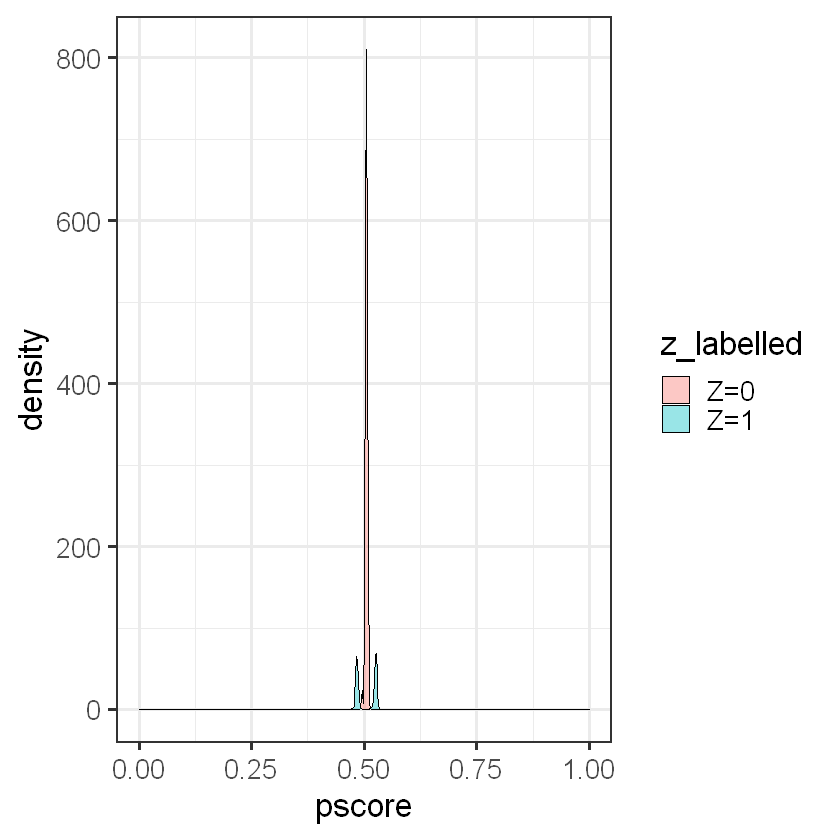

In [15]:
# add pscore to data frame 
data$pscore <- pscore.model$fitted.values 

# generate a labelled factor IV
data$z_labelled <- factor(z, 
                          levels = c(0,1), 
                          label = c("Z=0", "Z=1")) 

# Check for common support in propensity score 
ggplot(data, aes(x = pscore, fill = z_labelled)) + 
                        geom_density(alpha=0.4)  + 
                        theme_bw(base_size = 20) +
                                         xlim(0, 1)

* Here $X$'s are orthogonal to $Z$, as IV truly random.
* Poor common support.


**Estimate the semiparametric LATE using the `lateweight` command from the** `causalweight` **package which implements all of the above mentionned steps**

* But as we have seen in Session 2, a bit of a black box, so check common support manually. 
* Only works with binary treatment and instrument. 
* Can specify trimming. 

For more details, see https://cran.r-project.org/web/packages/causalweight/causalweight.pdf

In [16]:
# Exemplarily for the labour supply decision of mothers
late_workedm <- lateweight(y=workedm, # outcome
                           d=d, # binary endogenous treatment
                           z=z, # binary instrument 
                           x=x, # observed confounders
                           LATT=FALSE, # for LATE
                           logit=FALSE, # probit p-score model 
                           boot=2) # number of bootstrap replications 
# increase boot to 199 or higher and go for a walk 

# Display results
print("LATE: ")
round(c(late_workedm$effect),3)
print("standard error: ")
round(c(late_workedm$se.effect),3)
print("p-value: ")
late_workedm$pval.effect

[1] "LATE: "


[1] -0.123

[1] "standard error: "


[1] 0.013

[1] "p-value: "


[1] 2.414398e-22

In [17]:
# For all outcomes
sp.model <- function(y){
      sp.m <- lateweight(y=y, # outcome
                         d=d, # binary endogenous treatment
                         z=z, # binary instrument 
                         x=x, # observed confounders
                         LATT=FALSE, # for LATE
                         logit=FALSE, # probit p-score model 
                         boot=9) # number of bootstrap replications 
      list( sp.iv.coeff = sp.m$effect, 
            boot.se = sp.m$se.effect, 
            pval = sp.m$pval.effect)
}

# Apply to all outcomes of interest
sp.iv_output <- apply(y_mat, 2, sp.model)
sp.iv_output<-rbindlist(sp.iv_output)

# Bind OLS and IV results
output_all<-cbind(output, sp.iv_output)
rownames(output_all)<- y_names

# Display table
print("OLS, 2SLS and semiparametric LATE estimates of labour supply models")
xtable(output_all, digits=3)

[1] "OLS, 2SLS and semiparametric LATE estimates of labour supply models"


,ols.coeff,robust.se,pval,iv.coeff,robust.se,pval,sp.iv.coeff,boot.se,pval
workedm,-0.173,0.002,0.000,-0.115,0.037,0.002,-0.123,0.037,0.001
weeksm,-8.861,0.100,0.000,-4.101,1.649,0.013,-4.560,2.321,0.049
hourswm,-6.520,0.087,0.000,-3.847,1.405,0.006,-4.131,1.361,0.002
incomem,-3718.223,48.955,0.000,-1555.290,807.002,0.054,-1756.564,454.429,0.000
lfaminc,-0.134,0.006,0.000,0.056,0.100,0.576,0.042,0.098,0.665


Is it surprising that the semiparametric IV estimates do so closely match the parametric ones?

***

## References

Frölich M (2007). Nonparametric IV Estimation of Local Average Treatment Effects with
Covariates. *Economics Letters*, 139, 35-75.
